
# Project: TMDb Movieset Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue and I will be performing basic data analysis techniques to explore various interesting trends in these movie metrics.

The primary goal of the project is to go through the general data analysis process es using basic data analysis operations with NumPy, pandas, and Matplotlib. It consists of 4 parts:

1. Questions
2. Data Wrangling
3. Exploratory Data Analysis
4. Drawing Conclusion

### Questions:

#### General Questions: 

>1) Which movie gained the most profit throughout the years?

>2) Does the movie with a higher budget return subsequent profits?

#### Questions based upon the the most successful movies:

>1) What are the characteristics of a successful movie(popularity, vote avg, budget)?

>2) Is the revenue propotionate to the poularity of the movie?

#### Top Keywords and Trends followed through the years:

>1) Number of movies released year after year.

>2) Generes trends.


In [2]:
#Importing all packages that will be used henceforth

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

Lets have a look at the basic characteristics of the dataset provided and further dig into the answers of the questions that were asked above.

In [16]:
#Extracting the dataset using pd.read_csv
df_tmdb = pd.read_csv('tmdb-movies.csv')
df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [17]:
#Rows and Columns 
df_tmdb.shape

(10866, 21)

In [18]:
#A brief description of the data we're going to use to evaluate our observations
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [19]:
#Gathering the information of null and NaN values that'll help us learn which columns are to be cleaned.
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>After having a close look at the data, the following coloumns are not necessarily required as they will not help us determine any outcomes in the future:

1. id
2. imdb_id
3. homepage
4. tagline
5. overview
6. production_companies
7. budget_adj
8. revenue_adj

>Hence, we must delete them to obtain a cleaner dataset. 

>Also we shall drop all duplicates and coloumns with null values. 


### Data Cleaning 

In [20]:
#Removing unused columns 

df_tmdb.drop(['id','imdb_id','homepage','tagline','overview','production_companies','budget_adj','revenue_adj'],axis=1, inplace=True)
df_tmdb.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


### Removing Duplicate Rows if any.

In [21]:
df_tmdb.drop_duplicates(keep ='first', inplace=True)
rows, col = df_tmdb.shape

print('There are now {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are now 10864 total entries of movies and 13 no.of columns in it.


There was one duplicate row and now it's been deleted.

> Now we must delete 0's from budget and revenue columns.

In [22]:
# creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
df_tmdb[temp_list] = df_tmdb[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df_tmdb.dropna(subset = temp_list, inplace = True)

rows, col = df_tmdb.shape
print('The remaining number of movies are {}.'.format(rows-1))

The remaining number of movies are 3853.


> Change the datatypes of budget and revenue columns from floart to int

In [23]:
change_dtype=['budget', 'revenue']
df_tmdb[change_dtype]=df_tmdb[change_dtype].applymap(np.int64)

df_tmdb.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
keywords           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
dtype: object

> Also we need to change the format of release date column to standard date format.

In [24]:
df_tmdb.release_date = pd.to_datetime(df_tmdb['release_date'])

In [25]:
df_tmdb.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


> Replace 0 with NaN in runtime column

In [26]:
df_tmdb['runtime'] =df_tmdb['runtime'].replace(0, np.NAN)
df_tmdb.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis

> Now that the dataset is trimmed and tidy we can perform our analyses on the dataset and get answers for the questions imposed earlier. 

### Questions

#### 1) Which movie gained the most profit throughout the years?

In [27]:
df_tmdb.insert(3,'profit_gained',df_tmdb['revenue']-df_tmdb['budget'])
df_tmdb.head()

,popularity,budget,revenue,profit_gained,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


In [28]:
import pprint

def calculate(column):
    #highest earned profit
    high= df_tmdb[column].idxmax()
    high_details=pd.DataFrame(df_tmdb.loc[high])
    
    #lowest earned profit
    low= df_tmdb[column].idxmin()
    low_details=pd.DataFrame(df_tmdb.loc[low])
    
    #concatenating data
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('profit_gained')

,1386,2244
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
profit_gained,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


>As seen above the movie that has gained hte most profit throughout the years is 'Avatar'. I have compared it with the least profit generating movie i.e 'The Warriors Way'. By this comparison we can also say that it is not necessary that a movie with a large budget always turns out to be succesful.

#### 2)Does the movie with a higher budget return subsequent profits?

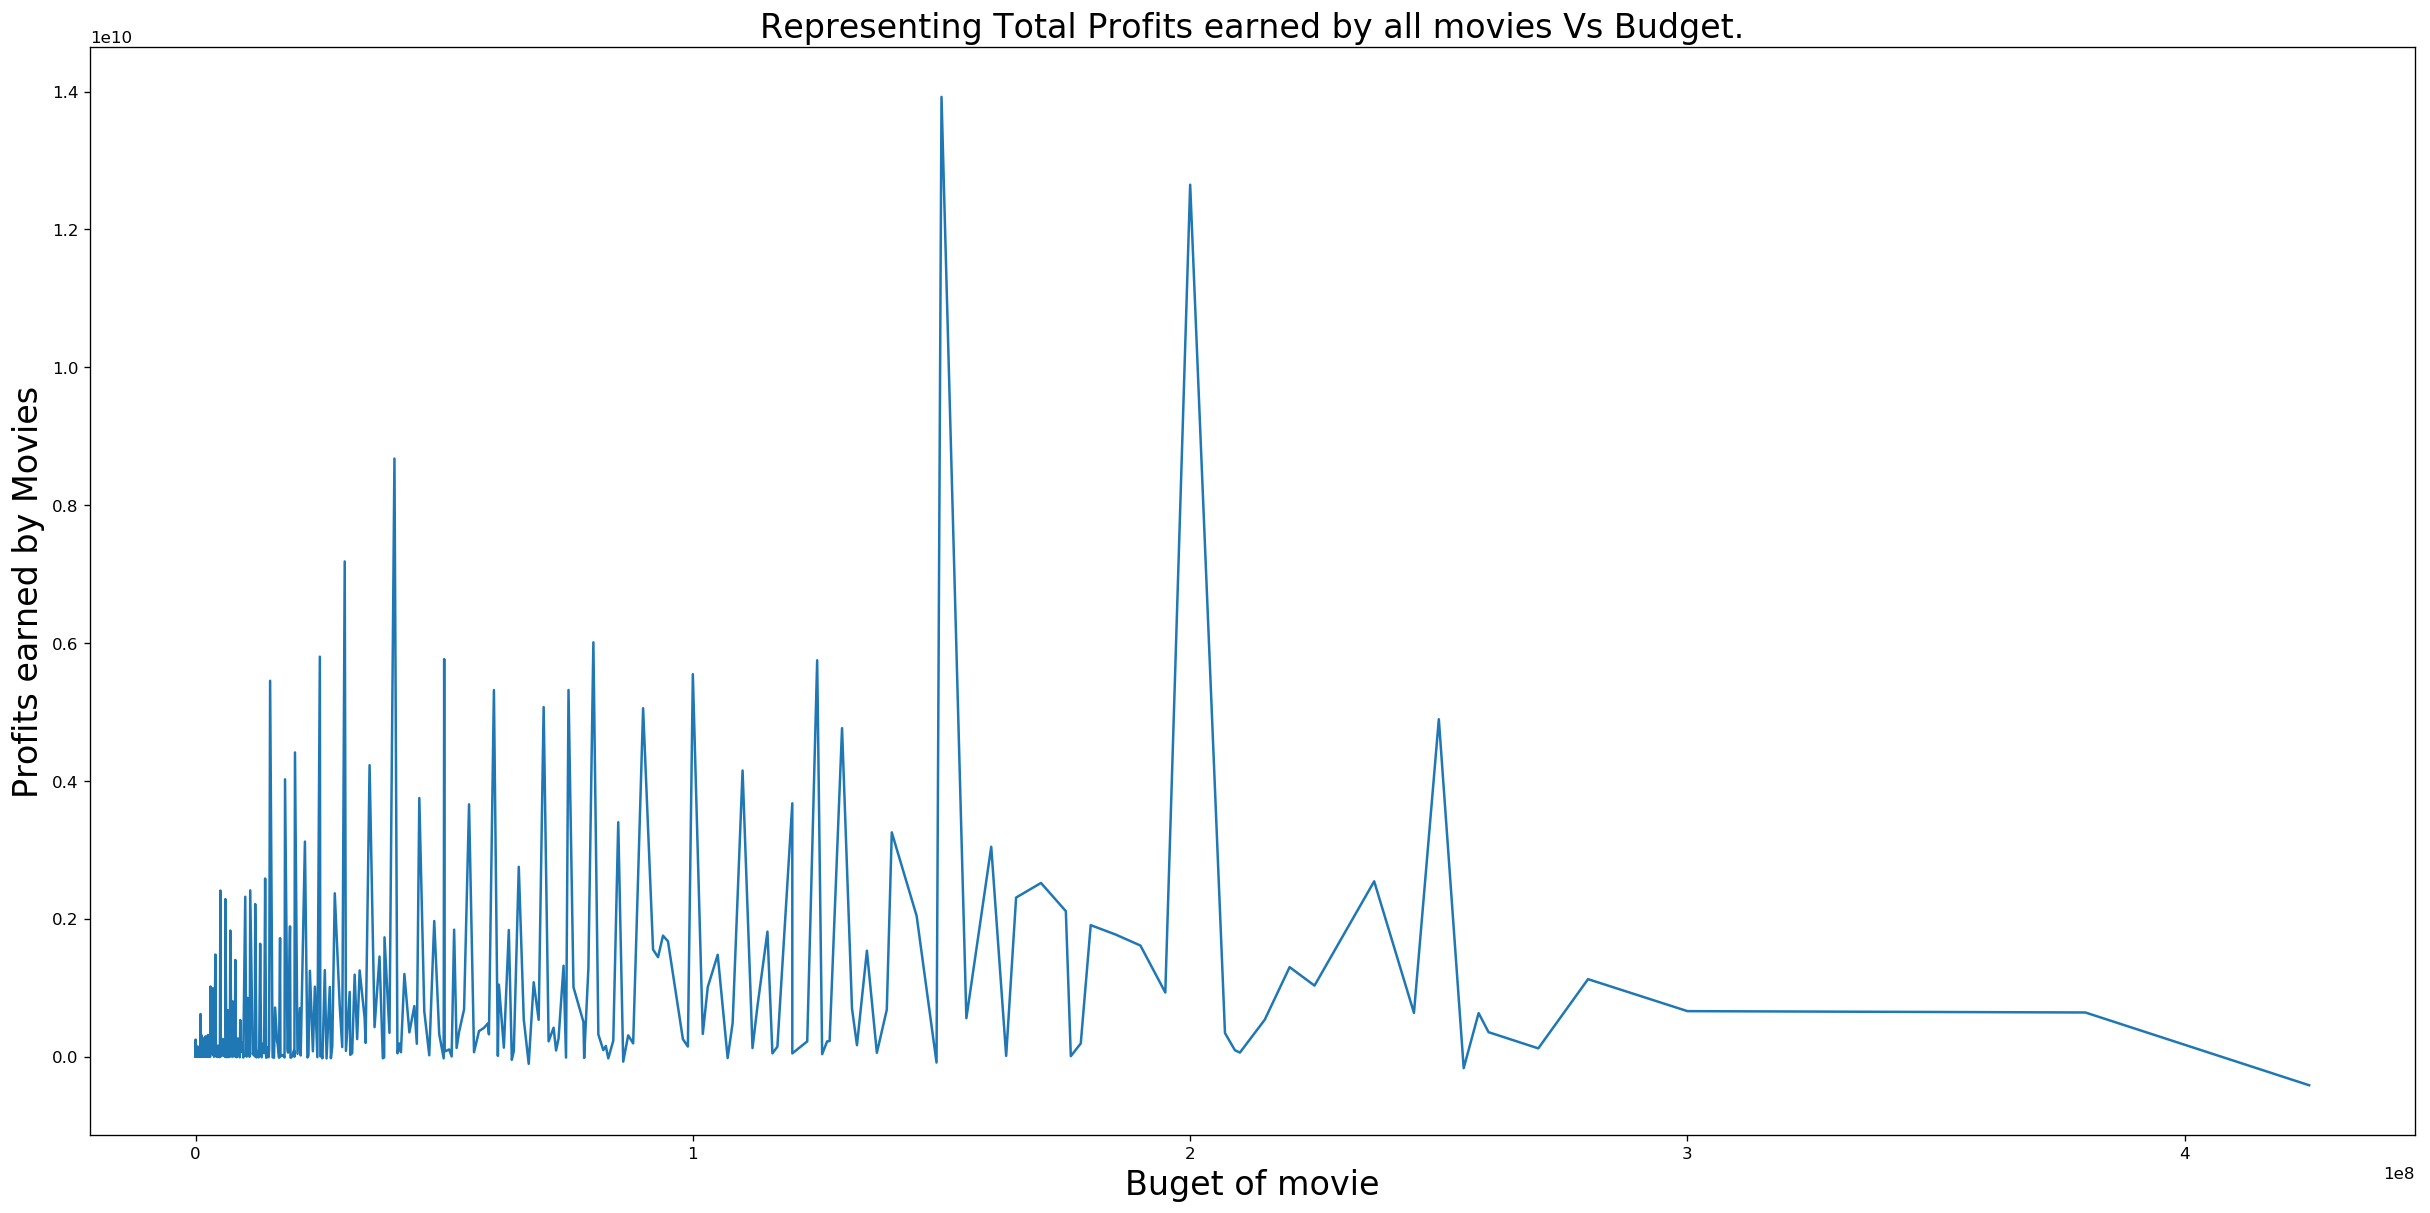

In [29]:
profits = df_tmdb.groupby('budget')['profit_gained'].sum()

#figure size(width, height)
plt.figure(figsize=(25,12), dpi = 120)

#on x-axis
plt.xlabel('Buget of movie', fontsize = 20)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 20)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Budget.', fontsize = 20)

#plotting the graph
plt.plot(profits)

#displaying the line plot
plt.show()

> The graph clearly shows that it is not necessary to have a large budget to create a profitable movie. Movies with low budgets have turned out to be highly profitable and also movies with high budgets have turned out to be major fails. 

### Questions based upon the the most successful movies:

#### 1) What are the characteristics of a successful movie(popularity, vote count, budget)?

> Selecting top 100 movies:

In [31]:
# Select Top 100 popular movies.
# fisrt sort it by release year ascending and popularity descending
df_top_p = df_tmdb.sort_values(['release_year','popularity'], ascending=[True, False])
#group by year and choose the top 100 high
df_top_p = df_top_p.groupby('release_year').head(100).reset_index(drop=True)
#check, it must start from 1960, and with high popularity to low
df_top_p.head(2)

,popularity,budget,revenue,profit_gained,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
0,2.610362,806948,32000000,31193052,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,2060-08-14,1180,8.0,1960
1,1.872132,2000000,4905000,2905000,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,horse|village|friendship|remake|number in title,128,Action|Adventure|Western,2060-10-23,224,7.0,1960


> Select Top 100 high revenue movies in every year.

In [33]:
# Select Top 100 high revenue movies.
# fisrt sort it by release year ascending and revenue descending
df_top_r = df_tmdb.sort_values(['release_year','revenue'], ascending=[True, False])
#group by year and choose the top 100 high
df_top_r = df_top_r.groupby('release_year').head(100).reset_index(drop=True)
#check, it must start from 1960, and with high revenue to low
df_top_r.head(2)

,popularity,budget,revenue,profit_gained,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
0,1.136943,12000000,60000000,48000000,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,gladiator|roman empire|gladiator fight|slavery...,197,Action|Drama|History,2060-10-06,211,6.9,1960
1,2.610362,806948,32000000,31193052,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,2060-08-14,1180,8.0,1960


> Select Top 100 high score rating movies in every year

In [34]:
# Select Top 100 high score rating movies.
# fisrt sort it by release year ascending and high score rating descending
df_top_s = df_tmdb.sort_values(['release_year','vote_average'], ascending=[True, False])
#group by year and choose the top 100 high
df_top_s = df_top_s.groupby('release_year').head(100).reset_index(drop=True)
#check, it must start from 1960, and with high scorer ating to low
df_top_s.head(2)

,popularity,budget,revenue,profit_gained,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
0,2.610362,806948,32000000,31193052,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,2060-08-14,1180,8.0,1960
1,0.947307,3000000,25000000,22000000,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,new york|new year's eve|lovesickness|age diffe...,125,Comedy|Drama|Romance,2060-06-15,235,7.9,1960


> To compare results I have created a dataset with the worst performing movies

In [35]:
# the last 100 popular movies in every year
df_low_p = df_tmdb.sort_values(['release_year','popularity'], ascending=[True, True])
df_low_p = df_low_p.groupby('release_year').head(100).reset_index(drop=True)
# the last 100 high revenue movies in every year
df_low_r = df_tmdb.sort_values(['release_year','revenue'], ascending=[True, True])
df_low_r = df_low_r.groupby('release_year').head(100).reset_index(drop=True)
# the last 100 score rating movies in every year
df_low_s = df_tmdb.sort_values(['release_year','vote_average'], ascending=[True, True])
df_low_s = df_low_s.groupby('release_year').head(100).reset_index(drop=True)

#### 1.1)  What's the budget level movie are associated with movies that have high popularity?

> First, divided budget data into four levels with it's quartile: 'Low', 'Medium', 'Moderately High', 'High' and create a level column

In [36]:
def cut_into_quantile(dfname ,column_name):
# find quartile, max and min values
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four budget level groups
    bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 
# Creates budget_levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return dfname

In [37]:
# use cut_into_quantile function to build a level column
profit_data = cut_into_quantile(df_tmdb,'budget')
profit_data.head(1)

,popularity,budget,revenue,profit_gained,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year,budget_levels
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,High


In [38]:
# Find the mean and median popularity of each level with groupby
result_mean = df_tmdb.groupby('budget_levels')['popularity'].mean()
result_mean

budget_levels
Low                0.685685
Medium             0.951718
Moderately High    1.142414
High               2.080911
Name: popularity, dtype: float64

In [39]:
result_median = df_tmdb.groupby('budget_levels')['popularity'].median()
result_median

budget_levels
Low                0.501163
Medium             0.702632
Moderately High    0.887989
High               1.443270
Name: popularity, dtype: float64

> Now, to visualize the data

In [40]:
# the x locations for the groups
ind = np.arange(len(result_mean))  
# the width of the bars
width = 0.7      
ind

array([0, 1, 2, 3])

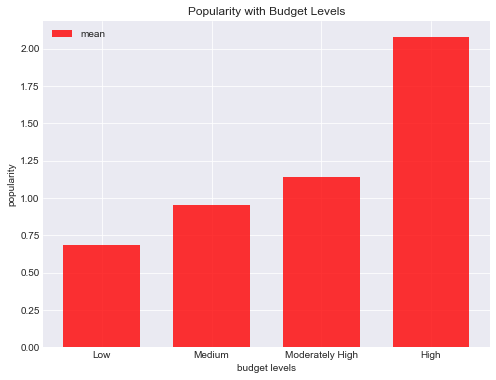

In [41]:
# plot bars
#set style
sns.set_style('darkgrid')
plt.subplots(figsize=(8, 6))
bars = plt.bar(ind, result_mean, width, color='r', alpha=.8, label='mean')

# title and labels
plt.ylabel('popularity')
plt.xlabel('budget levels')
plt.title('Popularity with Budget Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend()

> It clearly shows that movies with a higher budget end up gaining more popularity.

#### 2) Is the revenue propotionate to the poularity of the movie?

In [42]:
# use cut_into_quantile function to build a level column
profit_data = cut_into_quantile(df_tmdb,'revenue')
profit_data.head(1)

,popularity,budget,revenue,profit_gained,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year,budget_levels,revenue_levels
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,High,High


In [43]:

# Find the mean and median voting score of each level with groupby
result_mean = profit_data.groupby('revenue_levels')['popularity'].mean()
result_mean

revenue_levels
Low                0.533143
Medium             0.779282
Moderately High    1.130572
High               2.322729
Name: popularity, dtype: float64

In [44]:
result_median = profit_data.groupby('revenue_levels')['popularity'].median()
result_median

revenue_levels
Low                0.436529
Medium             0.606839
Moderately High    0.927339
High               1.725160
Name: popularity, dtype: float64

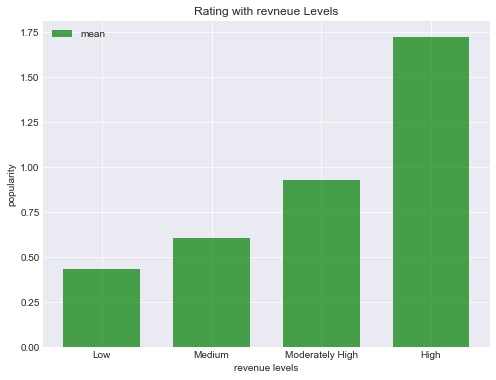

In [45]:
# plot bars
#set style
sns.set_style('darkgrid')
ind = np.arange(len(result_mean))  # the x locations for the groups
width = 0.7      # the width of the bars

# plot bars
plt.subplots(figsize=(8, 6))
bars = plt.bar(ind, result_median, width, color='g', alpha=.7, label='mean')

# title and labels
plt.ylabel('popularity')
plt.xlabel('revenue levels')
plt.title('Rating with revneue Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend( loc='upper left')

> Therefore, we can see that the popularity is pretty much propotionate to revenue generated by a movie. Its safe to say that the higher the revenue generated by the movie the more popular it is.

> Moving on the final part of our analysis

## Top Keywords and Trends followed through the years:

### 1) Number of movies released year after year.

In [46]:
movies_released = df_tmdb.groupby('release_year').count()['original_title']
movies_released.head()

release_year
1960     5
1961    10
1962     7
1963     6
1964     7
Name: original_title, dtype: int64

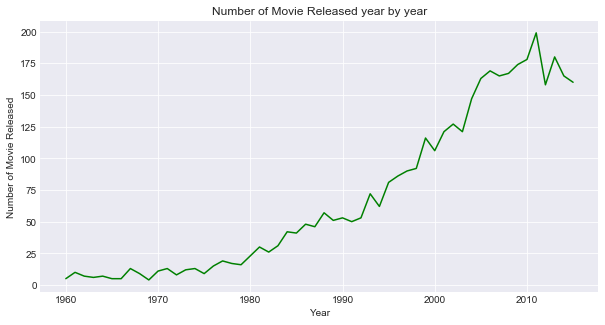

In [47]:
sns.set_style('darkgrid')
#set x, y axis data
# x is movie release year
x = movies_released.index
# y is number of movie released
y = movies_released
#set size
plt.figure(figsize=(10, 5))
#plot line chart 
plt.plot(x, y, color = 'g', label = 'mean')
#set title and labels
plt.title('Number of Movie Released year by year')
plt.xlabel('Year')
plt.ylabel('Number of Movie Released');

> We can see there is an upward trend in the movies being released year after year, but there's a slight dip after the 2010 mark.

### 2) Generes trends

In [48]:
#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = profit_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [49]:
#variable to store the retured value
count = data('genres')
#printing top 5 values
count.head()

Drama        1756
Comedy       1358
Thriller     1204
Action       1085
Adventure     749
dtype: int64

> Now to visualize the data 

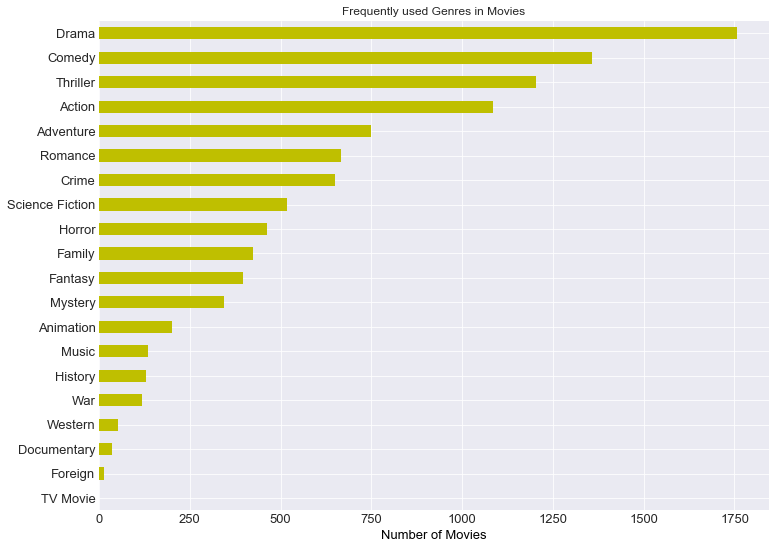

In [50]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = 'y', fontsize = 13)

#title
lt.set(title = 'Frequently used Genres in Movies')

# on x axis
lt.set_xlabel('Number of Movies', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

<a id='conclusions'></a>
## Conclusions

>The experience of executing the project as a whole was a lot of fun. Also, movies have always been one of my many interests and I chose this dataset only for this reason. Finding new trends and studying how to make a great movie which is accepted by the audience at the same time provides a huge revenue and also the insight provided while studying the data was really exciting.

#### My findings are as follows :

1. It is not necessary to have a high budget to create a succesful movie. 
2. The popularity of the movie is directly propotionate to the budget and revenue generated by the movie. The popularity according to me was because of heavy advertising because of which more people got awarre about the movie. 
3. There has been a heavy acceleration in the releasing of new movies year after year. More people are getting attracted to the big screen and more movies are being made.
4. The most popular genre was 'Drama'. Looks like people love the drama amongst human lives. Haha! 

### Limitations :

1. The vote_average column was dependant on the vote_count column. So, the average number of votes couldn't be determined because the value of vote_count differed for each movie. But, I chose to retain the data because that was the only way to determine what the audience thought about the movies.

2. The unit of the revenue earned or budget is not specified. So each movie mentioned in the dataset could've had a differnt currency unit and subsequently the amount of revenue generated or budget required to make these movies could be different.

3. A lot of movies had '0' represented in the budget and revenue coloumns. I deleted all those rows and was left with less 60% of the data. The analysis conducted by me was on a very small dataset in comparison to the original dataset. 

4. Droppinmg rows leads to an incomplete dataset to conduct analysis upon. All the outcomes of the analysis depend upon the values stored in the dataset and if the data provided is incomplete or not well filtered, the resulting analysis could be questioned upon. 